<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

# Imports

In [63]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Ftrl, Adam



### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

#### Train_Validate_Test split function for .npz (zip file)

In [46]:
def split_zip_df(path):
  data = np.load(path)
  features = 'arr_0'
  target = 'arr_1'
  X = data[features]
  y = data[target]
  X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.20,
      stratify= y,
      random_state=17)
  X_train, X_val, y_train, y_val = train_test_split(
      X_train, y_train, test_size=0.20,
      stratify= y_train,
      random_state=17)

  return X_train, y_train, X_val, y_val, X_test, y_test

  
X_train, y_train, X_val, y_val, X_test, y_test = split_zip_df('quickdraw10.npz')

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((64000, 784), (64000,), (16000, 784), (16000,), (20000, 784), (20000,))

### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

In [54]:
def create_model(lr, opt): #lr = Learning rate, opt = optimizer
  model = Sequential([
                      Dense(32, activation='relu', input_dim=784),
                      Dense(32, activation='relu'),
                      Dense(16, activation='relu'),
                      Dense(10, activation='softmax')
  ])
  opt = opt(learning_rate = lr)
  model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [56]:
model = create_model(lr = 0.01, opt = SGD)
bt_largest = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=512,
    validation_data=(X_val,y_val))


Epoch 1/25
125/125 [==============================] - 1s 6ms/step - loss: 7.3052 - accuracy: 0.1103 - val_loss: 2.2027 - val_accuracy: 0.1721
Epoch 2/25
125/125 [==============================] - 1s 5ms/step - loss: 2.1445 - accuracy: 0.1848 - val_loss: 2.1200 - val_accuracy: 0.1991
Epoch 3/25
125/125 [==============================] - 1s 6ms/step - loss: 2.0500 - accuracy: 0.2193 - val_loss: 2.0176 - val_accuracy: 0.2328
Epoch 4/25
125/125 [==============================] - 1s 6ms/step - loss: 1.9680 - accuracy: 0.2466 - val_loss: 1.9649 - val_accuracy: 0.2455
Epoch 5/25
125/125 [==============================] - 1s 6ms/step - loss: 1.9233 - accuracy: 0.2503 - val_loss: 1.9231 - val_accuracy: 0.2543
Epoch 6/25
125/125 [==============================] - 1s 6ms/step - loss: 1.8919 - accuracy: 0.2524 - val_loss: 1.8956 - val_accuracy: 0.2536
Epoch 7/25
125/125 [==============================] - 1s 6ms/step - loss: 1.8669 - accuracy: 0.2593 - val_loss: 1.8758 - val_accuracy: 0.2617
Epoch 

In [17]:
model = create_model(lr = 0.01, opt = SGD)
bt_large = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=256,
    validation_data=(X_val,y_val))

Epoch 1/25
250/250 [==============================] - 1s 4ms/step - loss: 6.8093 - accuracy: 0.0991 - val_loss: 2.3051 - val_accuracy: 0.1001
Epoch 2/25
250/250 [==============================] - 1s 4ms/step - loss: 2.3040 - accuracy: 0.0998 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 3/25
250/250 [==============================] - 1s 4ms/step - loss: 2.3021 - accuracy: 0.0990 - val_loss: 2.3885 - val_accuracy: 0.1017
Epoch 4/25
250/250 [==============================] - 1s 4ms/step - loss: 2.3034 - accuracy: 0.0986 - val_loss: 2.3036 - val_accuracy: 0.0997
Epoch 5/25
250/250 [==============================] - 1s 4ms/step - loss: 2.3022 - accuracy: 0.0993 - val_loss: 2.3032 - val_accuracy: 0.0997
Epoch 6/25
250/250 [==============================] - 1s 4ms/step - loss: 2.3008 - accuracy: 0.1006 - val_loss: 2.2945 - val_accuracy: 0.1135
Epoch 7/25
250/250 [==============================] - 1s 4ms/step - loss: 2.1824 - accuracy: 0.1668 - val_loss: 2.1234 - val_accuracy: 0.1834
Epoch 

In [19]:
model = create_model(lr = 0.01, opt = SGD)
bt_default = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=128,
    validation_data=(X_val,y_val))

Epoch 1/25
500/500 [==============================] - 1s 3ms/step - loss: 23.6279 - accuracy: 0.1162 - val_loss: 2.1687 - val_accuracy: 0.1614
Epoch 2/25
500/500 [==============================] - 1s 3ms/step - loss: 2.0232 - accuracy: 0.2347 - val_loss: 1.9369 - val_accuracy: 0.2597
Epoch 3/25
500/500 [==============================] - 1s 3ms/step - loss: 1.9090 - accuracy: 0.2747 - val_loss: 1.8795 - val_accuracy: 0.2788
Epoch 4/25
500/500 [==============================] - 1s 2ms/step - loss: 1.8686 - accuracy: 0.2829 - val_loss: 1.8545 - val_accuracy: 0.2835
Epoch 5/25
500/500 [==============================] - 1s 3ms/step - loss: 1.8391 - accuracy: 0.2958 - val_loss: 1.8265 - val_accuracy: 0.3042
Epoch 6/25
500/500 [==============================] - 1s 3ms/step - loss: 1.8131 - accuracy: 0.3060 - val_loss: 1.8606 - val_accuracy: 0.2949
Epoch 7/25
500/500 [==============================] - 1s 3ms/step - loss: 1.7954 - accuracy: 0.3091 - val_loss: 1.8126 - val_accuracy: 0.3090
Epoch

In [82]:
model = create_model(lr = 0.01, opt = SGD)
bt_small = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=64,
    validation_data=(X_val,y_val))

Epoch 1/25
1000/1000 [==============================] - 2s 2ms/step - loss: 9.0533 - accuracy: 0.0981 - val_loss: 2.3528 - val_accuracy: 0.1000
Epoch 2/25
1000/1000 [==============================] - 2s 2ms/step - loss: 2.3029 - accuracy: 0.0974 - val_loss: 2.3526 - val_accuracy: 0.1000
Epoch 3/25
1000/1000 [==============================] - 2s 2ms/step - loss: 2.3029 - accuracy: 0.0993 - val_loss: 2.3526 - val_accuracy: 0.1000
Epoch 4/25
1000/1000 [==============================] - 2s 2ms/step - loss: 2.3028 - accuracy: 0.0983 - val_loss: 2.3526 - val_accuracy: 0.1000
Epoch 5/25
1000/1000 [==============================] - 2s 2ms/step - loss: 2.3028 - accuracy: 0.0966 - val_loss: 2.3520 - val_accuracy: 0.1000
Epoch 6/25
1000/1000 [==============================] - 2s 2ms/step - loss: 2.3032 - accuracy: 0.0970 - val_loss: 2.3502 - val_accuracy: 0.0999
Epoch 7/25
1000/1000 [==============================] - 2s 2ms/step - loss: 2.3039 - accuracy: 0.0976 - val_loss: 2.3492 - val_accuracy:

In [81]:
lr = 0.01
model = create_model(lr = lr, opt = SGD)
bt_smallest = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=32,
    validation_data=(X_val,y_val))

Epoch 1/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.4312 - accuracy: 0.1485 - val_loss: 2.0374 - val_accuracy: 0.2107
Epoch 2/25
2000/2000 [==============================] - 3s 1ms/step - loss: 1.9583 - accuracy: 0.2303 - val_loss: 1.9252 - val_accuracy: 0.2016
Epoch 3/25
2000/2000 [==============================] - 3s 1ms/step - loss: 1.8257 - accuracy: 0.2783 - val_loss: 1.8021 - val_accuracy: 0.3173
Epoch 4/25
2000/2000 [==============================] - 3s 1ms/step - loss: 1.9838 - accuracy: 0.2637 - val_loss: 2.0709 - val_accuracy: 0.1867
Epoch 5/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.2284 - accuracy: 0.1465 - val_loss: 2.2875 - val_accuracy: 0.1308
Epoch 6/25
2000/2000 [==============================] - 3s 1ms/step - loss: 2.2739 - accuracy: 0.1318 - val_loss: 2.2646 - val_accuracy: 0.1283
Epoch 7/25
2000/2000 [==============================] - 3s 1ms/step - loss: 2.2573 - accuracy: 0.1278 - val_loss: 2.2446 - val_accuracy:

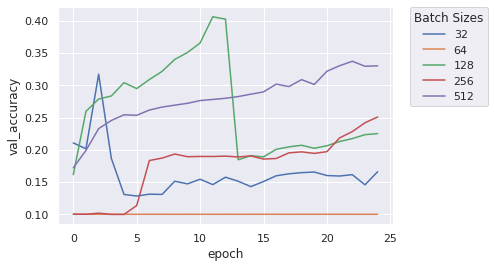

In [83]:
batch_sizes = []
for exp, result in zip([bt_smallest, bt_small, bt_default, bt_large, bt_largest], ["32", "64", "128", "256", "512"]):
    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Batch Size'] = result
    batch_sizes.append(df)
df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')

sns.set(style="darkgrid")
sns.lineplot(x='epoch', y='val_accuracy', hue = 'Batch Size', data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, title = 'Batch Sizes')

After experimentation with several batch sizes, I have concluded that 32 is the best 
batch size of the 5 values tried. The largest batch sizes increased accuracy consistantly 
but at a much slower rate. The others both dropped off in their performance over the 
later epochs and never reached the accuracy levels of batch siz 32. Even smaller batch 
sizes could yeild better results.

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [58]:
lr = 1
model = create_model(lr = lr, opt = SGD)
lr_largest = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=32,
    validation_data=(X_val,y_val))

Epoch 1/25
2000/2000 [==============================] - 3s 2ms/step - loss: 979412518031794896896.0000 - accuracy: 0.0987 - val_loss: 2.3090 - val_accuracy: 0.1000
Epoch 2/25
2000/2000 [==============================] - 3s 1ms/step - loss: 2.3101 - accuracy: 0.1001 - val_loss: 2.3093 - val_accuracy: 0.1000
Epoch 3/25
2000/2000 [==============================] - 3s 1ms/step - loss: 2.3101 - accuracy: 0.0972 - val_loss: 2.3098 - val_accuracy: 0.1000
Epoch 4/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.3104 - accuracy: 0.0989 - val_loss: 2.3101 - val_accuracy: 0.1000
Epoch 5/25
2000/2000 [==============================] - 3s 1ms/step - loss: 2.3100 - accuracy: 0.1003 - val_loss: 2.3126 - val_accuracy: 0.1000
Epoch 6/25
2000/2000 [==============================] - 3s 1ms/step - loss: 2.3098 - accuracy: 0.0991 - val_loss: 2.3117 - val_accuracy: 0.1000
Epoch 7/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.3098 - accuracy: 0.0998 - val_loss: 2.

In [49]:
lr = 0.1
model = create_model(lr = lr, opt = SGD)
lr_large = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=32,
    validation_data=(X_val,y_val))

Epoch 1/25
2000/2000 [==============================] - 3s 2ms/step - loss: 621.4458 - accuracy: 0.0994 - val_loss: 3334.4121 - val_accuracy: 0.0999
Epoch 2/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.3034 - accuracy: 0.0990 - val_loss: 3334.4021 - val_accuracy: 0.1000
Epoch 3/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.3033 - accuracy: 0.0995 - val_loss: 3334.4155 - val_accuracy: 0.0999
Epoch 4/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.3034 - accuracy: 0.0980 - val_loss: 3334.4084 - val_accuracy: 0.1000
Epoch 5/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.3033 - accuracy: 0.0997 - val_loss: 3334.4033 - val_accuracy: 0.1000
Epoch 6/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.3033 - accuracy: 0.1013 - val_loss: 3334.4016 - val_accuracy: 0.1000
Epoch 7/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.3033 - accuracy: 0.1008 - val_loss: 33

In [50]:
lr = 0.01
model = create_model(lr = lr, opt = SGD)
lr_default = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=32,
    validation_data=(X_val,y_val))

Epoch 1/25
2000/2000 [==============================] - 3s 2ms/step - loss: 1367.0112 - accuracy: 0.0983 - val_loss: 2.2992 - val_accuracy: 0.1040
Epoch 2/25
2000/2000 [==============================] - 3s 1ms/step - loss: 4.4344 - accuracy: 0.1268 - val_loss: 2.3041 - val_accuracy: 0.1001
Epoch 3/25
2000/2000 [==============================] - 3s 1ms/step - loss: 2.3029 - accuracy: 0.0980 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 4/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.3016 - accuracy: 0.0968 - val_loss: 2.2953 - val_accuracy: 0.1076
Epoch 5/25
2000/2000 [==============================] - 3s 1ms/step - loss: 11.2066 - accuracy: 0.1267 - val_loss: 2.3059 - val_accuracy: 0.1000
Epoch 6/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.2958 - accuracy: 0.1042 - val_loss: 2.2657 - val_accuracy: 0.1211
Epoch 7/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.2278 - accuracy: 0.1384 - val_loss: 2.1789 - val_accur

In [51]:
lr = 0.001
model = create_model(lr = lr, opt = SGD)
lr_small = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=32,
    validation_data=(X_val,y_val))

Epoch 1/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.1578 - accuracy: 0.2399 - val_loss: 1.8637 - val_accuracy: 0.3246
Epoch 2/25
2000/2000 [==============================] - 3s 1ms/step - loss: 1.7969 - accuracy: 0.3492 - val_loss: 1.7706 - val_accuracy: 0.3461
Epoch 3/25
2000/2000 [==============================] - 3s 2ms/step - loss: 1.7203 - accuracy: 0.3704 - val_loss: 1.7031 - val_accuracy: 0.3781
Epoch 4/25
2000/2000 [==============================] - 3s 2ms/step - loss: 1.6518 - accuracy: 0.3875 - val_loss: 1.5747 - val_accuracy: 0.3931
Epoch 5/25
2000/2000 [==============================] - 3s 2ms/step - loss: 1.5142 - accuracy: 0.4445 - val_loss: 1.5483 - val_accuracy: 0.4985
Epoch 6/25
2000/2000 [==============================] - 3s 2ms/step - loss: 1.4441 - accuracy: 0.4933 - val_loss: 1.4557 - val_accuracy: 0.4978
Epoch 7/25
2000/2000 [==============================] - 3s 1ms/step - loss: 1.3874 - accuracy: 0.5131 - val_loss: 1.3934 - val_accuracy:

In [52]:
lr = 0.0001
model = create_model(lr = lr, opt = SGD)
lr_smallest = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=32,
    validation_data=(X_val,y_val))

Epoch 1/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.6976 - accuracy: 0.1037 - val_loss: 2.3141 - val_accuracy: 0.1014
Epoch 2/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.3078 - accuracy: 0.1011 - val_loss: 2.3085 - val_accuracy: 0.1013
Epoch 3/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.3045 - accuracy: 0.1015 - val_loss: 2.3072 - val_accuracy: 0.1018
Epoch 4/25
2000/2000 [==============================] - 3s 1ms/step - loss: 2.3008 - accuracy: 0.1035 - val_loss: 2.2986 - val_accuracy: 0.1090
Epoch 5/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.2497 - accuracy: 0.1345 - val_loss: 2.2257 - val_accuracy: 0.1470
Epoch 6/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.2116 - accuracy: 0.1501 - val_loss: 2.2082 - val_accuracy: 0.1539
Epoch 7/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.1988 - accuracy: 0.1549 - val_loss: 2.1996 - val_accuracy:

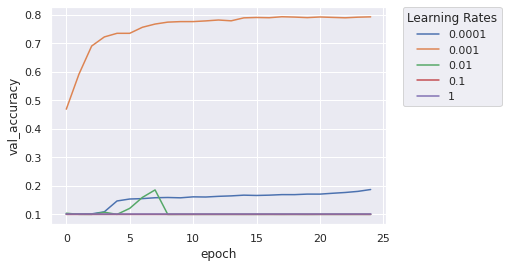

In [80]:
learning_rates = []
for exp, result in zip([lr_smallest, lr_small, lr_default, lr_large, lr_largest], ["0.0001", "0.001", "0.01", "0.1", "1"]):
    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Learning Rate'] = result
    learning_rates.append(df)
df = pd.concat(learning_rates)
df['Learning Rate'] = df['Learning Rate'].astype('str')

sns.set(style="darkgrid")
sns.lineplot(x='epoch', y='val_accuracy', hue = 'Learning Rate', data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, title = 'Learning Rates')

The learning rate 0.001 yeilds the best results by far with the SGD optimizer. The
 lower learning rate steps up entirerly too slowly, and higher learning rates seem to 
 reverse their positive effects on accuracy or have no influence at all on accuracy. I found 
 these results to be consistant over several runs of these tests. 

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [69]:
lr = 0.001
model = create_model(lr = lr, opt = Adam)
opt_Adam = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=32,
    validation_data=(X_val,y_val))

Epoch 1/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.0933 - accuracy: 0.3520 - val_loss: 1.4035 - val_accuracy: 0.4755
Epoch 2/25
2000/2000 [==============================] - 4s 2ms/step - loss: 1.1818 - accuracy: 0.5820 - val_loss: 1.0077 - val_accuracy: 0.6549
Epoch 3/25
2000/2000 [==============================] - 4s 2ms/step - loss: 0.9481 - accuracy: 0.6748 - val_loss: 0.8859 - val_accuracy: 0.7241
Epoch 4/25
2000/2000 [==============================] - 4s 2ms/step - loss: 0.8303 - accuracy: 0.7339 - val_loss: 0.7972 - val_accuracy: 0.7418
Epoch 5/25
2000/2000 [==============================] - 5s 3ms/step - loss: 0.7604 - accuracy: 0.7519 - val_loss: 0.7577 - val_accuracy: 0.7614
Epoch 6/25
2000/2000 [==============================] - 4s 2ms/step - loss: 0.7222 - accuracy: 0.7630 - val_loss: 0.7436 - val_accuracy: 0.7529
Epoch 7/25
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6937 - accuracy: 0.7759 - val_loss: 0.7219 - val_accuracy:

In [66]:
lr = 0.001
model = create_model(lr = lr, opt = Ftrl)
opt_Ftrl = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=32,
    validation_data=(X_val,y_val))

Epoch 1/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.6709 - accuracy: 0.3451 - val_loss: 1.7656 - val_accuracy: 0.4244
Epoch 2/25
2000/2000 [==============================] - 5s 3ms/step - loss: 1.6554 - accuracy: 0.4567 - val_loss: 1.5672 - val_accuracy: 0.4820
Epoch 3/25
2000/2000 [==============================] - 4s 2ms/step - loss: 1.5096 - accuracy: 0.4982 - val_loss: 1.4568 - val_accuracy: 0.5138
Epoch 4/25
2000/2000 [==============================] - 4s 2ms/step - loss: 1.4179 - accuracy: 0.5276 - val_loss: 1.3827 - val_accuracy: 0.5421
Epoch 5/25
2000/2000 [==============================] - 4s 2ms/step - loss: 1.3525 - accuracy: 0.5553 - val_loss: 1.3271 - val_accuracy: 0.5667
Epoch 6/25
2000/2000 [==============================] - 4s 2ms/step - loss: 1.3005 - accuracy: 0.5802 - val_loss: 1.2835 - val_accuracy: 0.5898
Epoch 7/25
2000/2000 [==============================] - 4s 2ms/step - loss: 1.2577 - accuracy: 0.6017 - val_loss: 1.2471 - val_accuracy:

In [65]:
lr = 0.001
model = create_model(lr = lr, opt = RMSprop)
opt_RMSprop = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=32,
    validation_data=(X_val,y_val))

Epoch 1/25
2000/2000 [==============================] - 4s 2ms/step - loss: 1.8020 - accuracy: 0.5025 - val_loss: 1.0831 - val_accuracy: 0.7108
Epoch 2/25
2000/2000 [==============================] - 4s 2ms/step - loss: 0.9590 - accuracy: 0.7269 - val_loss: 0.8579 - val_accuracy: 0.7445
Epoch 3/25
2000/2000 [==============================] - 4s 2ms/step - loss: 0.8793 - accuracy: 0.7467 - val_loss: 0.8985 - val_accuracy: 0.7522
Epoch 4/25
2000/2000 [==============================] - 4s 2ms/step - loss: 0.8626 - accuracy: 0.7461 - val_loss: 0.9093 - val_accuracy: 0.7190
Epoch 5/25
2000/2000 [==============================] - 4s 2ms/step - loss: 0.8775 - accuracy: 0.7495 - val_loss: 0.9499 - val_accuracy: 0.7684
Epoch 6/25
2000/2000 [==============================] - 4s 2ms/step - loss: 0.8966 - accuracy: 0.7552 - val_loss: 0.9481 - val_accuracy: 0.7566
Epoch 7/25
2000/2000 [==============================] - 4s 2ms/step - loss: 0.9211 - accuracy: 0.7465 - val_loss: 0.9902 - val_accuracy:

In [64]:
lr = 0.001
model = create_model(lr = lr, opt = Adagrad)
opt_Adagrad = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=32,
    validation_data=(X_val,y_val))

Epoch 1/25
2000/2000 [==============================] - 3s 2ms/step - loss: 3.5831 - accuracy: 0.1894 - val_loss: 2.2504 - val_accuracy: 0.2024
Epoch 2/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.1598 - accuracy: 0.2299 - val_loss: 2.1006 - val_accuracy: 0.2529
Epoch 3/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.0535 - accuracy: 0.2655 - val_loss: 2.0319 - val_accuracy: 0.2750
Epoch 4/25
2000/2000 [==============================] - 3s 2ms/step - loss: 1.9993 - accuracy: 0.2832 - val_loss: 1.9917 - val_accuracy: 0.2891
Epoch 5/25
2000/2000 [==============================] - 3s 2ms/step - loss: 1.9587 - accuracy: 0.2962 - val_loss: 1.9581 - val_accuracy: 0.3039
Epoch 6/25
2000/2000 [==============================] - 3s 2ms/step - loss: 1.9184 - accuracy: 0.3292 - val_loss: 1.9177 - val_accuracy: 0.3411
Epoch 7/25
2000/2000 [==============================] - 3s 2ms/step - loss: 1.8715 - accuracy: 0.3563 - val_loss: 1.8725 - val_accuracy:

In [59]:
lr = 0.001
model = create_model(lr = lr, opt = SGD)
opt_SGD = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=32,
    validation_data=(X_val,y_val))

Epoch 1/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.0336 - accuracy: 0.3436 - val_loss: 1.6211 - val_accuracy: 0.4624
Epoch 2/25
2000/2000 [==============================] - 3s 2ms/step - loss: 1.5132 - accuracy: 0.5076 - val_loss: 1.4165 - val_accuracy: 0.5476
Epoch 3/25
2000/2000 [==============================] - 3s 2ms/step - loss: 1.3375 - accuracy: 0.5864 - val_loss: 1.2520 - val_accuracy: 0.6185
Epoch 4/25
2000/2000 [==============================] - 3s 2ms/step - loss: 1.2065 - accuracy: 0.6354 - val_loss: 1.1731 - val_accuracy: 0.6471
Epoch 5/25
2000/2000 [==============================] - 3s 2ms/step - loss: 1.1334 - accuracy: 0.6587 - val_loss: 1.1357 - val_accuracy: 0.6556
Epoch 6/25
2000/2000 [==============================] - 3s 2ms/step - loss: 1.0848 - accuracy: 0.6713 - val_loss: 1.0873 - val_accuracy: 0.6729
Epoch 7/25
2000/2000 [==============================] - 3s 2ms/step - loss: 1.0496 - accuracy: 0.6802 - val_loss: 1.0549 - val_accuracy:

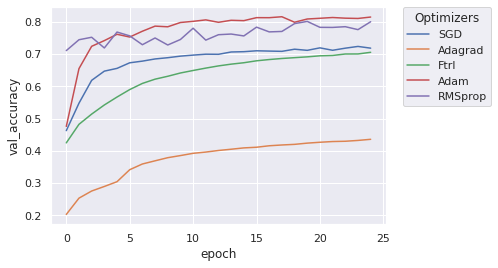

In [84]:
optimizers = []
for exp, result in zip([opt_SGD, opt_Adagrad, opt_Ftrl, opt_Adam, opt_RMSprop], ["SGD", "Adagrad", "Ftrl", "Adam", "RMSprop"]):
    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Optimizer'] = result
    optimizers.append(df)
df = pd.concat(optimizers)
df['Optimizer'] = df['Optimizer'].astype('str')

sns.set(style="darkgrid")
sns.lineplot(x='epoch', y='val_accuracy', hue = 'Optimizer', data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, title = 'Optimizers')

The Adam optimizer yeilds the highest accuracy afte 25 epochs with a learning rate of 0.001 and a batch size of 32. Now I will try a couple more itertations with Adam with larger and smaller batches and a higher and lower learning rate.

## Adam with lower and higher learning rates

In [75]:
lr = 0.01
model = create_model(lr = lr, opt = Adam)
lr_big = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=32,
    validation_data=(X_val,y_val))

Epoch 1/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.3522 - accuracy: 0.0985 - val_loss: 2.3047 - val_accuracy: 0.1000
Epoch 2/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.3047 - accuracy: 0.1014 - val_loss: 2.3033 - val_accuracy: 0.1000
Epoch 3/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.3040 - accuracy: 0.0995 - val_loss: 2.3042 - val_accuracy: 0.1000
Epoch 4/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.3039 - accuracy: 0.1017 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 5/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.3040 - accuracy: 0.0990 - val_loss: 2.3037 - val_accuracy: 0.1000
Epoch 6/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.3040 - accuracy: 0.0987 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 7/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.3039 - accuracy: 0.1008 - val_loss: 2.3036 - val_accuracy:

In [76]:
lr = 0.0001
model = create_model(lr = lr, opt = Adam)
lr_tiny = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=32,
    validation_data=(X_val,y_val))

Epoch 1/25
2000/2000 [==============================] - 4s 2ms/step - loss: 3.6881 - accuracy: 0.1282 - val_loss: 2.1937 - val_accuracy: 0.1877
Epoch 2/25
2000/2000 [==============================] - 4s 2ms/step - loss: 2.0463 - accuracy: 0.2443 - val_loss: 1.9471 - val_accuracy: 0.2898
Epoch 3/25
2000/2000 [==============================] - 4s 2ms/step - loss: 1.8633 - accuracy: 0.3153 - val_loss: 1.8055 - val_accuracy: 0.3287
Epoch 4/25
2000/2000 [==============================] - 4s 2ms/step - loss: 1.7579 - accuracy: 0.3441 - val_loss: 1.7325 - val_accuracy: 0.3581
Epoch 5/25
2000/2000 [==============================] - 4s 2ms/step - loss: 1.6865 - accuracy: 0.3624 - val_loss: 1.6775 - val_accuracy: 0.3730
Epoch 6/25
2000/2000 [==============================] - 4s 2ms/step - loss: 1.5102 - accuracy: 0.4496 - val_loss: 1.4476 - val_accuracy: 0.4729
Epoch 7/25
2000/2000 [==============================] - 4s 2ms/step - loss: 1.3876 - accuracy: 0.4910 - val_loss: 1.3750 - val_accuracy:

Neither attempt at adjusting the learnign rate yeided a better accuruacy. Now I will try with smaller batch sizes. 

In [78]:
lr = 0.001
model = create_model(lr = lr, opt = Adam)
bt_tiny = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=16,
    validation_data=(X_val,y_val))

Epoch 1/25
4000/4000 [==============================] - 7s 2ms/step - loss: 1.9945 - accuracy: 0.2859 - val_loss: 1.5496 - val_accuracy: 0.4244
Epoch 2/25
4000/4000 [==============================] - 6s 2ms/step - loss: 1.3684 - accuracy: 0.4944 - val_loss: 1.2348 - val_accuracy: 0.5855
Epoch 3/25
4000/4000 [==============================] - 6s 2ms/step - loss: 1.0954 - accuracy: 0.6417 - val_loss: 0.9871 - val_accuracy: 0.6891
Epoch 4/25
4000/4000 [==============================] - 6s 2ms/step - loss: 0.8760 - accuracy: 0.7267 - val_loss: 0.7867 - val_accuracy: 0.7573
Epoch 5/25
4000/4000 [==============================] - 6s 2ms/step - loss: 0.7571 - accuracy: 0.7704 - val_loss: 0.7460 - val_accuracy: 0.7719
Epoch 6/25
4000/4000 [==============================] - 6s 2ms/step - loss: 0.7021 - accuracy: 0.7885 - val_loss: 0.7245 - val_accuracy: 0.7833
Epoch 7/25
4000/4000 [==============================] - 6s 2ms/step - loss: 0.6642 - accuracy: 0.8006 - val_loss: 0.6840 - val_accuracy:

In [79]:
lr = 0.001
model = create_model(lr = lr, opt = Adam)
bt_itty_bitty = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=8,
    validation_data=(X_val,y_val))

Epoch 1/25
8000/8000 [==============================] - 13s 2ms/step - loss: 2.2576 - accuracy: 0.2065 - val_loss: 1.8068 - val_accuracy: 0.3152
Epoch 2/25
8000/8000 [==============================] - 13s 2ms/step - loss: 1.6369 - accuracy: 0.3769 - val_loss: 1.3805 - val_accuracy: 0.5026
Epoch 3/25
8000/8000 [==============================] - 12s 2ms/step - loss: 1.2071 - accuracy: 0.5858 - val_loss: 1.0554 - val_accuracy: 0.6604
Epoch 4/25
8000/8000 [==============================] - 12s 2ms/step - loss: 1.0240 - accuracy: 0.6695 - val_loss: 0.9926 - val_accuracy: 0.6927
Epoch 5/25
8000/8000 [==============================] - 12s 2ms/step - loss: 0.9575 - accuracy: 0.7011 - val_loss: 0.9631 - val_accuracy: 0.7107
Epoch 6/25
8000/8000 [==============================] - 12s 2ms/step - loss: 0.9006 - accuracy: 0.7281 - val_loss: 0.8973 - val_accuracy: 0.7351
Epoch 7/25
8000/8000 [==============================] - 13s 2ms/step - loss: 0.8544 - accuracy: 0.7504 - val_loss: 0.9193 - val_ac

No improvement on overall model accuracy was found. Also, the fitting of these models were 
considerably slower than previous iterations. 
Lastly, I will try to increase the number of 
epochs to see what peak accuracy can be found with the best parameters found. 

In [85]:
lr = 0.001
model = create_model(lr = lr, opt = Adam)
opt_Adam = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=32,
    validation_data=(X_val,y_val))

Epoch 1/40
2000/2000 [==============================] - 4s 2ms/step - loss: 2.2594 - accuracy: 0.2375 - val_loss: 1.8959 - val_accuracy: 0.2592
Epoch 2/40
2000/2000 [==============================] - 4s 2ms/step - loss: 1.7709 - accuracy: 0.3186 - val_loss: 1.6479 - val_accuracy: 0.3672
Epoch 3/40
2000/2000 [==============================] - 4s 2ms/step - loss: 1.4259 - accuracy: 0.4789 - val_loss: 1.1711 - val_accuracy: 0.6096
Epoch 4/40
2000/2000 [==============================] - 4s 2ms/step - loss: 1.0035 - accuracy: 0.6729 - val_loss: 0.8839 - val_accuracy: 0.7224
Epoch 5/40
2000/2000 [==============================] - 3s 2ms/step - loss: 0.8178 - accuracy: 0.7519 - val_loss: 0.7775 - val_accuracy: 0.7679
Epoch 6/40
2000/2000 [==============================] - 4s 2ms/step - loss: 0.7270 - accuracy: 0.7833 - val_loss: 0.7589 - val_accuracy: 0.7707
Epoch 7/40
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6920 - accuracy: 0.7943 - val_loss: 0.7092 - val_accuracy:

No major improvements found. 30 epochs is slightly better than 25, but after 30 it pretty much treads water

In [87]:
model.summary()

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_188 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_189 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_190 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_191 (Dense)            (None, 10)                170       
Total params: 26,874
Trainable params: 26,874
Non-trainable params: 0
_________________________________________________________________


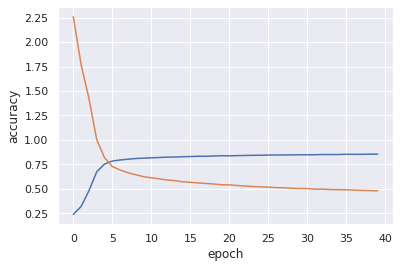

In [89]:
df = pd.DataFrame.from_records(opt_Adam.history)
df['epoch'] = [i for i in range(df.shape[0])]
sns.set(style="darkgrid")
ax = sns.lineplot(x='epoch', y='accuracy', data=df)
ax = sns.lineplot(x='epoch', y='loss', data=df)
plt.show()

### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 
```
As part of the neural network optimization process, the model wil run through forwards,
 evaluate the errors, and step backwards through the network adjusting the weights 
 between the neurons incrementally to reduce the error for the next run until the best set
  of wieghts is found. each run forwards and backwards making adjustments to the network is 
  known as an 'epoch'. The amount of change performed on each weight is independant of the
  others. The entire process of tuning these weights is known as 'backpropagation'.
```



## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


